# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
# Load the dataset into the pandas data frame

df=pd.read_csv('share_market_data.csv')

df2=df.copy()

# display the first 10 rows of the dataset

print(df.head(10))

         Date        Open        High         Low       Close   Volume
0  2023-01-01  113.679617  248.630921  126.470308  207.428707  2435719
1  2023-01-02  179.691931  234.584483  125.343535  194.803971  1231791
2  2023-01-03  109.302199  228.509870  116.551345  203.665900  1483330
3  2023-01-04  130.885919  226.767140  103.783303  219.855502  2427768
4  2023-01-05  154.428326  203.135891  123.397025  158.149225  2060962
5  2023-01-06  138.910591  249.936788  142.916197  192.477915  1292289
6  2023-01-07  160.330504  226.354356  115.217935  176.006412  1943966
7  2023-01-08  175.229286  201.286843  106.895944  152.433895  2068225
8  2023-01-09  170.616906  240.836158  107.893009  160.991217  2110090
9  2023-01-10  127.294389  231.097292  126.640032  179.389120  2478851


In [5]:
# Check the column names and shape of the dataframe

print(df.columns)

print(df.shape)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
(100, 6)


In [6]:
# use the .describe() method to view the statistical summary of the numerical columns.

df[['Open','High','Low','Close','Volume']].describe()

,Open,High,Low,Close,Volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,148.647676,223.566020,118.058514,184.662497,1.841486e+06
std,28.781768,14.249554,17.379971,21.111706,4.500567e+05
min,100.899582,200.266713,90.155599,150.594793,1.000902e+06
25%,124.803425,211.025952,103.440238,164.766333,1.478959e+06
50%,150.629823,224.851142,117.930767,185.480689,1.939917e+06
75%,174.508498,234.936005,132.071861,201.043854,2.254992e+06
max,199.787581,249.936788,149.478497,219.978857,2.488993e+06


In [ ]:
# Identify and count missing values in the dataset.

print(df.isnull().sum())

#there are no missing values in the dataset

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


# Data Cleaning

In [18]:
df.drop(columns='Date',inplace=True)

df

,Open,High,Low,Close,Volume
0,113.679617,248.630921,126.470308,207.428707,2435719
1,179.691931,234.584483,125.343535,194.803971,1231791
2,109.302199,228.509870,116.551345,203.665900,1483330
3,130.885919,226.767140,103.783303,219.855502,2427768
4,154.428326,203.135891,123.397025,158.149225,2060962
...,...,...,...,...,...
95,117.269463,229.929199,139.219546,216.909936,1634151
96,106.013569,211.238783,99.401689,182.349945,1102932
97,159.903247,247.106844,149.478497,215.952168,2028177
98,149.705586,202.847022,103.660036,180.713524,1141295


# Basic Analysis

In [19]:
# Calculate the difference between close and open columns and 
# store the values in the new column 'Price Change'

df['PriceChange']=df['Close']-df['Open']


In [12]:
# Check the percentage change for  consecutive days

print((df['PriceChange']/df['Close'])*100)

0     45.195813
1      7.757563
2     46.332597
3     40.467299
4      2.352777
        ...    
95    45.936334
96    41.862571
97    25.954322
98    17.158615
99    24.724010
Length: 100, dtype: float64


In [23]:
# Maximum values of 'High','Low' and 'Close' Prices

print(df[['High','Low','Close']].max())

print('-'*100)
# Minimum values of 'High','Low' and 'Close' Prices

print(df[['High','Low','Close']].min())


High     249.936788
Low      149.478497
Close    219.978857
dtype: float64
----------------------------------------------------------------------------------------------------
High     200.266713
Low       90.155599
Close    150.594793
dtype: float64


In [28]:
# Display the dates where these extreme prices occurred.

max_high,max_low,max_close=df2['High'].max(),df2['Low'].max(),df2['Close'].max()

print(f"Max High Date: {df2['Date'][df2['High']==max_high]}")
print("-"*100)
print(f"Max Low Date: {df2['Date'][df2['Low']==max_low]}")
print("-"*100)
print(f"Max Close Date: {df2['Date'][df2['Close']==max_close]}")

Max High Date: 5    2023-01-06
Name: Date, dtype: object
----------------------------------------------------------------------------------------------------
Max Low Date: 97    2023-04-08
Name: Date, dtype: object
----------------------------------------------------------------------------------------------------
Max Close Date: 66    2023-03-08
Name: Date, dtype: object


# Data Visualization

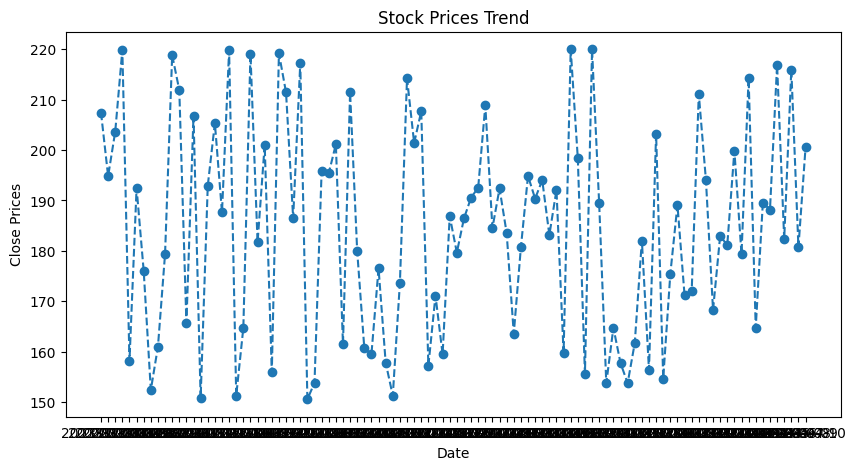

In [40]:
plt.figure(figsize=(10,5))
plt.plot(df2['Date'],df2['Close'],marker='o',linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.title("Stock Prices Trend")
plt.show()

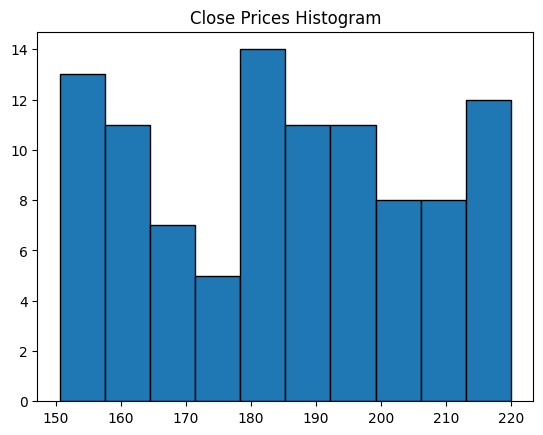

In [41]:
plt.hist(df['Close'],bins=10,edgecolor='black')
plt.title('Close Prices Histogram')
plt.show()

<Axes: ylabel='Close'>

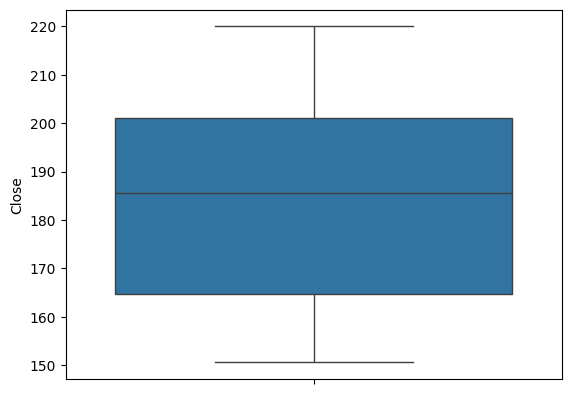

In [43]:
import seaborn as sns

sns.boxplot(df2['Close'])

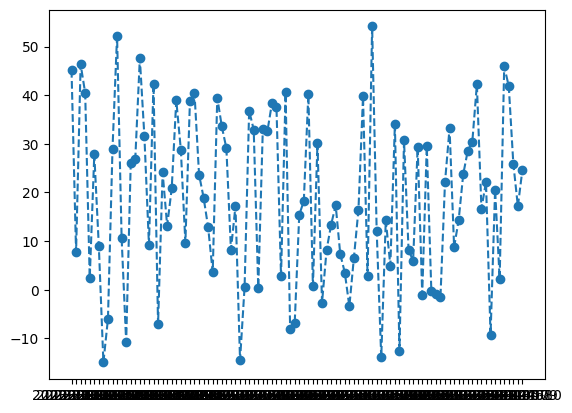

In [50]:
df['PercentageChange']=(df['PriceChange']/df['Close'])*100

plt.plot(df2['Date'],df['PercentageChange'],marker='o',linestyle='--')
plt.show()

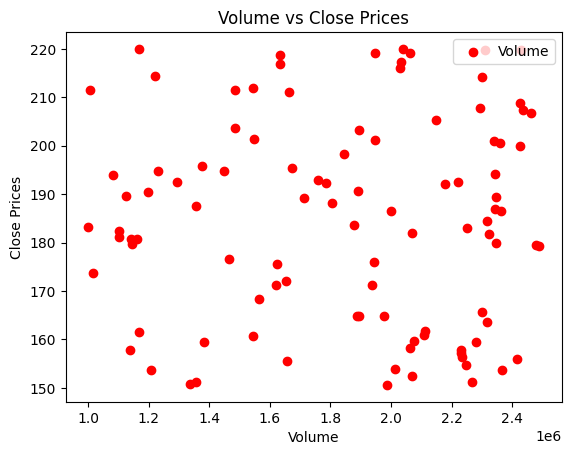

In [ ]:

plt.scatter(df['Volume'],df['Close'],c=['red'])
plt.title('Volume vs Close Prices')
plt.xlabel('Volume')
plt.ylabel('Close Prices')
plt.legend(['Volume','Close'],loc='upper right')
plt.show()